<a href="https://colab.research.google.com/github/Amulya77/TFF/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression with neural network

There are many definitions for a regression problem but in our case, we'are going to simplify it: predicting a numerical variable based on some other combinaion of variables, even shorter... predicting a number.

In [1]:
#Import TEnsorflow

import tensorflow as tf
print(tf.__version__)

2.8.2


###Creating data to fit and view

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#create features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y= np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


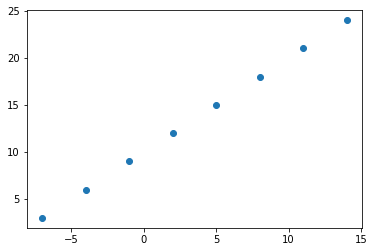

In [3]:
#visualize it
plt.scatter(x,y);

In [4]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# INput and output shapes

In [6]:
#Create a tesnor for our housing price prediction
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
x[0],y[0]



(-7.0, 3.0)

In [8]:
x[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [10]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape, output_shape

((), ())

In [11]:
x[0].ndim


0

In [12]:
x[0], y[0]

(-7.0, 3.0)

In [13]:
 #Turn out numpy array to tensors with dtype float 32
'''
at 4:44:50
running first neural network
Epoch 1/5
WARNING:tensorflow:Layer dense_3 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because its dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.'''
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

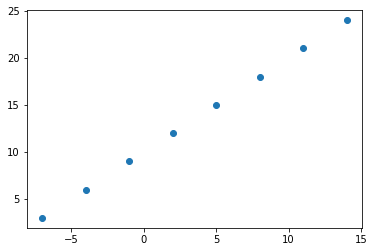

In [15]:
plt.scatter(x,y);

In [16]:
'''##OPtional creating 

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
'''


'##OPtional creating \n\nmodel=tf.keras.Sequential()\nmodel.add(tf.keras.layers.Dense(1))\n'

# STEPS in modelling with tensorflow
**1.Creating a model**-define the input and output layers,  as well as the hidden layers of a deep learning model.

**2.Compiling a model**- define the loss function(the function which tells our model how wrong it is)and the optimizer(tells how to improve the patterns its learning) and evaluation matrics(what we can use to interpret the performance of our model).

**3.fitting a model**-letting the model try to find patterns between x&y (features and labels)

In [17]:
"CODE BY AMULYA"
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
#model.fit(x, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)
#epochs= laps or opportunities to fit the model that many times

#epochs=how many time the model will go throug all of the training examples.

Epoch 1/5
1/1 [==============================] - 1s 602ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [18]:
#Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
#Try and make prediction using our model
y_pred=model.predict([17.0]) 
y_pred

array([[12.716021]], dtype=float32)

In [20]:
y_pred+11

array([[23.71602]], dtype=float32)

# WATCH VIDEO AT 4:50:20

## IMPROVING THE MODEL

we can improve our model, by altering steps 

1.**Creating a model**-here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function.

2.**Compiling a model**- here wr might change the optimizing function or perhaps the **learnning rate** of the optimizing function.

3.**fitting a model**-here we might fit a model for more **epochs**(leave it training for longer) or on more data (give model more examples to learn from).

In [21]:
#lets rebuild our model

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.fit the model
#model.fit(x,y,epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 600ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [22]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
#lets see model prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

# WATCH VIDEO AT 5:03:36

In [24]:
#Let's make another improvement

#1/.Create a model with extra hhidden layers with 100 hidden units
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
#3 fit the model
#model.fit(x,y,epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 20ms/step - loss: 4.26

In [25]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
#lets see model prediction has improved
model.predict([17.0])

array([[27.159163]], dtype=float32)

#####Common ways to improve a deep model :




• Adding layers

• Increase the number of hidden units

• Change the activation functions

• Change the optimization function

. **Change the learning rate**

• Fitting on more data

• Fitting for longer
               ( because you can alter each of
               these , they're hyperparameters )

**EVALUATING A MODEL**
A typical workflow you'll go through when building neural networks is:

**Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...**


The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

**Visualize, visualize, visualize**

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

**The data** - what data are you working with? What does it look like?

**The model itself** - what does the architecture look like? What are the different shapes?

**The training of a model** - how does a model perform while it learns?

***The predictions of a model *** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [27]:
#make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
#make labels for dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

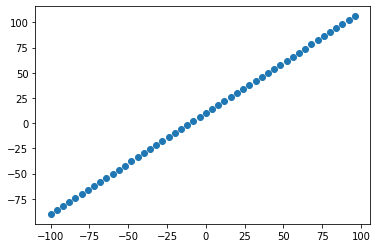

In [29]:
 #visualize the data
 import matplotlib.pyplot as plt
 plt.scatter(X,y)


###THE 3 sets 
Split data into training/test set-

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [30]:
#Check the length of how many samples we have

len(X)

50

In [31]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test),len(y_train), len(y_test)

(40, 10, 40, 10)

###Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

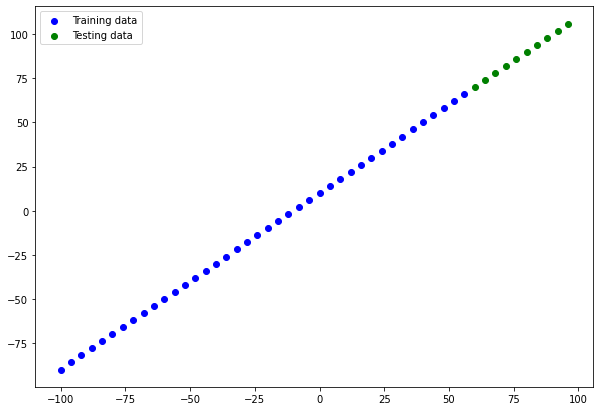

In [32]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [33]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

###Visualizing the model
After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling summary() on it.

🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [35]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: ignored

In [36]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
  tf.keras.layers.Dense(1,name="output_layer") # define the input_shape to our model
],name="model_1")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#DENSE means fully connected neural network

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during **transfer learning**).

📖 *** Resource:***  For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [39]:
#Let's fit our model to the training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [40]:
#Get a summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


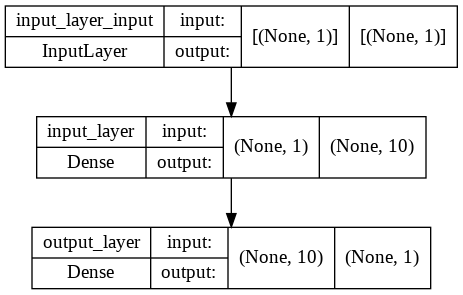

In [41]:
 from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

###Visualizing model predictions


Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [42]:
#make some predictions

y_pred=model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>


🔑 Note: If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [44]:
#Lets create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

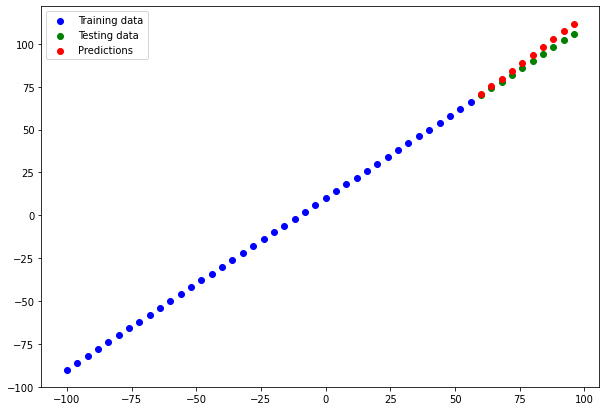

In [45]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

###Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [46]:
 #Evaluate the model on test
 model.evaluate(X_test,y_test)


1/1 [==============================] - 0s 177ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [47]:

tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [49]:
#Calculate the  MAE
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.constant(y_pred))
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [50]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [51]:
#Calculate the  MAE
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [52]:
#Calculate the MSE
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [53]:
#MAke some fuunction to reuse mae and mse

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))  

###RUNNING experiments to rebuild our model

```
Build a model - > fit it - > evaluate it - > tweak it - > fit it - > evaluate it - > tweak it - > fit it - > evaluate it ...
```
  1. Get more data - get more examples for your model to train on ( more opportunities to learn patterns or relationships between features and
    labels ) .
 2. Make your model larger ( using a more complex model ) - this might come in the form of more layers or more hidden units in each layer .
 3. Train for longer - give your model more of a chance to find patterns in the data .

In [54]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

`model_1` - same as original model, 1 layer, trained for 100 epochs.

`model_2` - 2 layers, trained for 100 epochs.

`model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**



In [55]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

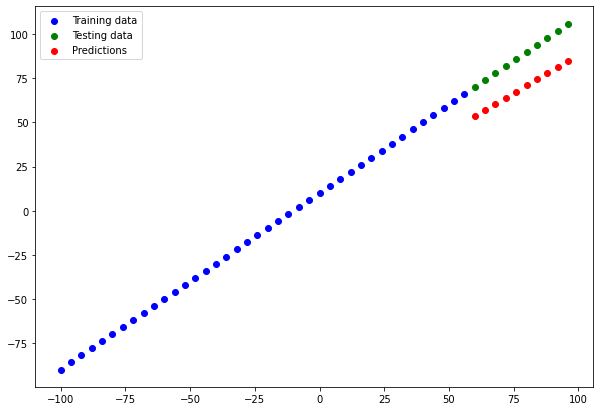

In [56]:
#Make a plot prediction for model1

y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [57]:
#Calculate model_1 evauation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

###Build model 2 for 
* 2 dense layer for 100 epochs

In [58]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 22.6625 - mse: 730.7203
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.9439 - mse: 457.8568
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8059 - mse: 246.0893
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 17.4504 - mse: 427.5064
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0637 - mse: 183.7775
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.8335 - mse: 113.4307
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7023 - mse: 138.7539
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mse: 139.0908
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 38.0435 - mse: 2242.6597
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.6226 - mse: 922.2128
Epoch 11/100
2/2 [============================

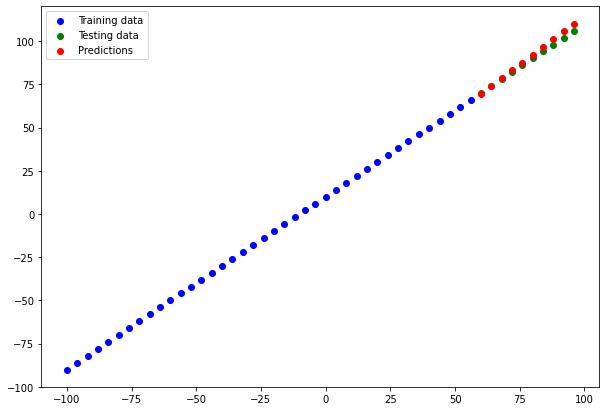

In [59]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [60]:
#Calculate model_2 evauation metrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9098114>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.459232>)

***BUILD MODEL 3***

In [61]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 22.6625 - mse: 730.7203
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 16.9439 - mse: 457.8568
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 13.8059 - mse: 246.0893
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 17.4504 - mse: 427.5064
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 12.0637 - mse: 183.7775
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 9.8335 - mse: 113.4307
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 10.7023 - mse: 138.7539
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 10.8713 - mse: 139.0908
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 38.0435 - mse: 2242.6597
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.6226 - mse: 922.2128
Epoch 11/500
2/2 [==============================]

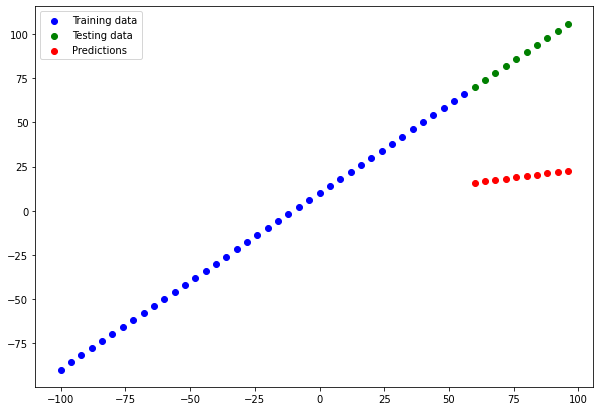

In [62]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [63]:
#Calculate model_3 evauation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68786>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.4717>)

**Comparing results**

Now we've got results for 3 similar but slightly different results, let's compare them.

In [64]:
import pandas as pd

import numpy
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


`looks like model 2 performs well`


In [65]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


From our experiments, it looks like model_2 performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work 

**Tracking your experiments**
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 **Resource:** But as you build more models, you'll want to look into using tools such as:

* *TensorBoard* - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

* *Weights & Biases* - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

##saving our models
Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).


You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. The SavedModel format (default).

2. The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [66]:
#save model using savemodel format
model_2.save("model2best_model")

In [67]:
#save model using HDF5 format
model_2.save("model2best_modelhdf5.h5")

###LOADING IN SAVE MODEL

In [68]:
#Load in  savemodel format

loaded_savedmodel_format=tf.keras.models.load_model("/content/model2best_model")
loaded_savedmodel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [70]:
#Compare model2 with savedmodel  format save model
model_2_preds=model_2.predict(X_test)
loaded_savemodel_preds=loaded_savedmodel_format.predict(X_test)
model_2_preds == loaded_savemodel_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [71]:
#loadin h5 model
loaded_h5_model=tf.keras.models.load_model("/content/model2best_modelhdf5.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [72]:
#Compare model2 with savedmodel  format save model
model_2_preds=model_2.predict(X_test)
loaded_h5_model_preds=loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###DOWNLOAD A MODEL (or any other file ) from google colab
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

1 Right click on the file in the files pane and click 'download'.

2 Use the code below.

In [73]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("model2best_modelhdf5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####A larger EXAMPLE

In [74]:
 #import required  libraries
 import tensorflow as tf
 import pandas as pd
 import matplotlib.pyplot as plt
 

In [75]:
#Read in the insurance dataset
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
insurance["sex"],insurance['age']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [77]:
#Lets try one hot encodigng using get_dummies functuion all to numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [78]:
 #create X and y values(featues and labels)
 X = insurance_one_hot.drop("charges",axis=1)
 y=  insurance_one_hot["charges"]



#view X, y
X.head(),y.head()






(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [79]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits


len(X), len(X_train),len(X_test)

(1338, 1070, 268)

In [89]:
#Build  a neural netwok (sort of like model_2 above)
tf.random.set_seed(42)

#1. Create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.  Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SDG(),
                        metrics=["mae"])
#3. Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 9ms/step - loss: 13342.9727 - mae: 13342.9727
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13329.9717 - mae: 13329.9717
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13315.9346 - mae: 13315.9346
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13300.0146 - mae: 13300.0146
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13281.5713 - mae: 13281.5713
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 13260.0322 - mae: 13260.0322
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 13235.2822 - mae: 13235.2822
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 13207.1514 - mae: 13207.1514
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 13175.4482 - mae: 13175.4482
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 13140.17

In [90]:
insurance_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                120       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [84]:
#check the results of model on test data

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [86]:
y_train.mean(),y_train.median()

(13346.089736364485, 9575.4421)

  **OUR MODEL IS NOT PERFORMING WELL< LETS IMPROVE IT**

  1. Add an extra layer with more hidden units and use adam optimizer
  2. same as above but can train for longer
  3. insert our own imagination


In [91]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model
insurance_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.compile
insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
#fit the model
insurance_model2.fit(X_train,y_train,epochs=100,verbose=0)


In [92]:
#Evaluate the model

insurance_model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 4989.4756 - mae: 4989.4756
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 4914.9385 - mae: 4914.9385
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 4841.3486 - mae: 4841.3486
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 4761.7690 - mae: 4761.7690
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 4682.7061 - mae: 4682.7061
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 4603.9321 - mae: 4603.9321
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 4509.5996 - mae: 4509.5996
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4419.8442 - mae: 4419.8442
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 4347.3979 - mae: 4347.3979
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4253.3604 - mae: 4253.3604

In [93]:
#evaluate on test
insurance_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3494.7285 - mae: 3494.7285


[3494.728515625, 3494.728515625]

In [94]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

WE JUST HALVED  the error rate above

LEts create model 3

In [119]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model
insurance_model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.compile
insurance_model3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
#fit the model
history=insurance_model3.fit(X_train,y_train,epochs=200,verbose=0)

In [108]:
insurance_model3.fit(X_train,y_train,epochs=200,verbose=0)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 3482.1660 - mae: 3482.1660
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 3476.7329 - mae: 3476.7329
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 3475.3398 - mae: 3475.3398
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 3480.9688 - mae: 3480.9688
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3477.2229 - mae: 3477.2229
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 3485.3784 - mae: 3485.3784
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3488.2056 - mae: 3488.2056
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3484.0613 - mae: 3484.0613
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3477.2673 - mae: 3477.2673
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3487.1021 - mae: 3487.1021

In [109]:
   #evaluate on test
insurance_model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3158.8086 - mae: 3158.8086


[3158.80859375, 3158.80859375]

In [110]:
#evaluate on train set
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

Text(0, 0.5, 'loss')

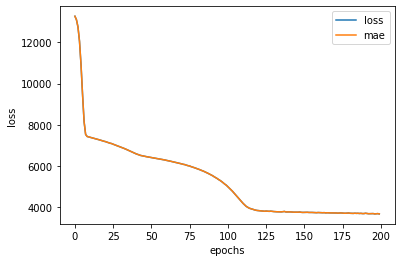

In [120]:
 #plot history

 pd.DataFrame(history.history).plot()
 plt.xlabel("epochs")
 plt.ylabel("loss")

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an **EarlyStopping callback** so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.



In [121]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [122]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3494.7285 - mae: 3494.7285


(3494.728515625, 3494.728515625)

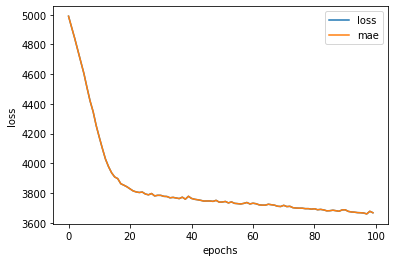

In [123]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

###**Preprocessing data (normalization and standardization)**
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called *normalization* (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call *standardization* which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
* **Normalizing** data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
* **Standardization** (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
* Which one should you use?
   * With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

* Scikit-Learn's documentation on preprocessing data.
* Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.


We've already turned our data into numbers using get_dummies(), let's see how we'd normalize it as well.

In [125]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [127]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

* make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
 *  MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
 *  OneHotEncoder - one hot encode the non-numerical columns.
Let's see them in action.

In [128]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [129]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [130]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [132]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as insurance_model_2.

In [134]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [138]:

insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 3472.6980 - mae: 3472.6980
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 3471.8572 - mae: 3471.8572
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 3472.2742 - mae: 3472.2742
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 3472.3691 - mae: 3472.3691
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 3475.1533 - mae: 3475.1533
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 3473.2314 - mae: 3473.2314
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 3471.7371 - mae: 3471.7371
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 3472.9429 - mae: 3472.9429
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 3472.1843 - mae: 3472.1843
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 3472.8232 - mae: 3472.8232

In [140]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3163.1641 - mae: 3163.1641


[3163.1640625, 3163.1640625]

In [142]:
#FROM OUR MODEL 2

#9/9 [==============================] - 0s 6ms/step - loss: 3494.7285 - mae: 3494.7285
#[3494.728515625, 3494.728515625]

#FROM OUR MODEL 3


#9/9 [==============================] - 0s 3ms/step - loss: 3158.8086 - mae: 3158.8086
#[3158.80859375, 3158.80859375]